In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import yfinance as yf

In [2]:
def fetch_stock_data(ticker):
    # Download the stock data
    df = yf.download(ticker, start="2000-01-01", end="2024-06-25")

    # Drop missing values
    df.dropna(inplace=True)

    # Create moving averages
    df['MA50'] = df['Adj Close'].rolling(50).mean()
    df['MA100'] = df['Adj Close'].rolling(100).mean()
    df['MA200'] = df['Adj Close'].rolling(200).mean()

    # Shift the closing price down to create a column for the next day's closing price
    df['Next_Close'] = df['Adj Close'].shift(-1)

    return df


In [3]:
ticker = "AAPL"

df = fetch_stock_data(ticker)
print(df.head())

[*********************100%%**********************]  1 of 1 completed

                Open      High       Low     Close  Adj Close     Volume  \
Date                                                                       
2000-01-03  0.936384  1.004464  0.907924  0.999442   0.844981  535796800   
2000-01-04  0.966518  0.987723  0.903460  0.915179   0.773741  512377600   
2000-01-05  0.926339  0.987165  0.919643  0.928571   0.785063  778321600   
2000-01-06  0.947545  0.955357  0.848214  0.848214   0.717125  767972800   
2000-01-07  0.861607  0.901786  0.852679  0.888393   0.751094  460734400   

            MA50  MA100  MA200  Next_Close  
Date                                        
2000-01-03   NaN    NaN    NaN    0.773741  
2000-01-04   NaN    NaN    NaN    0.785063  
2000-01-05   NaN    NaN    NaN    0.717125  
2000-01-06   NaN    NaN    NaN    0.751094  
2000-01-07   NaN    NaN    NaN    0.737884  


In [4]:
#describe the data
print(df.describe())

              Open         High          Low        Close    Adj Close  \
count  6157.000000  6157.000000  6157.000000  6157.000000  6157.000000   
mean     38.709196    39.125580    38.311529    38.734288    37.358844   
std      54.482803    55.071790    53.941967    54.529416    54.284227   
min       0.231964     0.235536     0.227143     0.234286     0.198078   
25%       2.296786     2.328214     2.254286     2.283571     1.930651   
50%      15.406071    15.535714    15.225000    15.361429    13.193151   
75%      43.417500    43.750000    43.087502    43.522499    41.114048   
max     217.589996   220.199997   213.000000   216.669998   216.669998   

             Volume         MA50        MA100        MA200   Next_Close  
count  6.157000e+03  6108.000000  6058.000000  5958.000000  6156.000000  
mean   3.931283e+08    36.870783    36.443128    35.515178    37.364776  
std    3.845988e+08    53.417258    52.745473    51.198426    54.286641  
min    2.404830e+07     0.216013     

In [5]:
# check for NaN values
# MA are supposed to have NaN values
df.isnull().sum()

Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
MA50           49
MA100          99
MA200         199
Next_Close      1
dtype: int64

Text(0, 0.5, 'Price')

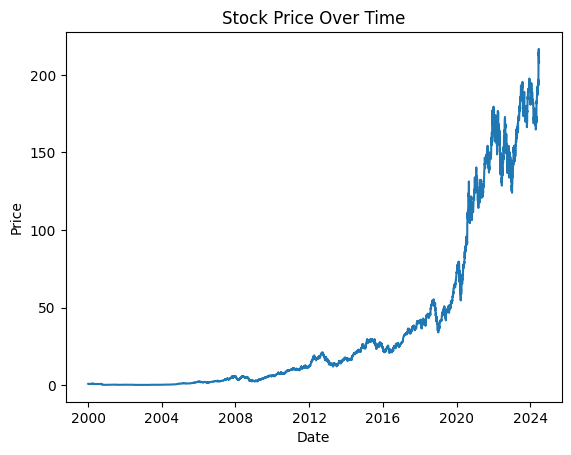

In [6]:
# Plot the closing price of the stock data
plt.figure()
plt.plot(df['Adj Close'], label='Adj Close')
plt.title('Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

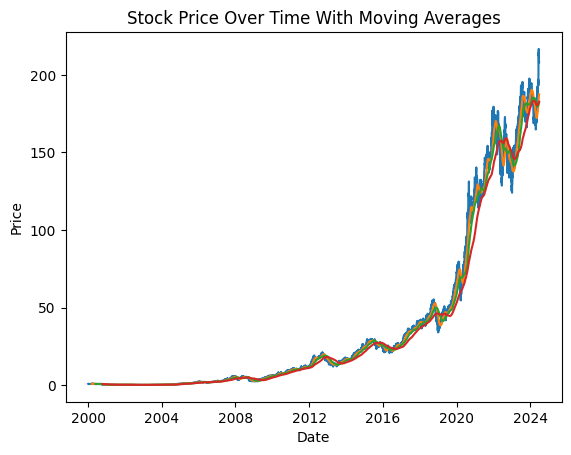

In [7]:
# plot the closing price against the moving averages
plt.figure()
plt.plot(df['Adj Close'], label='Adj Close')
plt.plot(df['MA50'], label='MA50')
plt.plot(df['MA100'], label='MA100')
plt.plot(df['MA200'], label='MA200')
plt.title('Stock Price Over Time With Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')

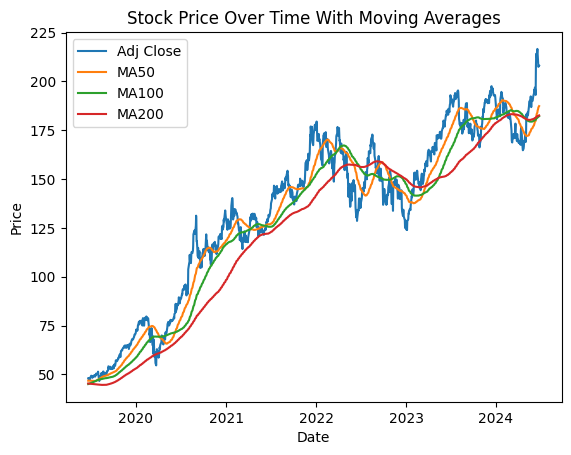

In [8]:
# plotting the graph for the last 5 years only
plt.figure()
plt.plot(df['Adj Close'][-1260:], label='Adj Close')
plt.plot(df['MA50'][-1260:], label='MA50')
plt.plot(df['MA100'][-1260:], label='MA100')
plt.plot(df['MA200'][-1260:], label='MA200')
plt.title('Stock Price Over Time With Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

Text(0, 0.5, 'Volume')

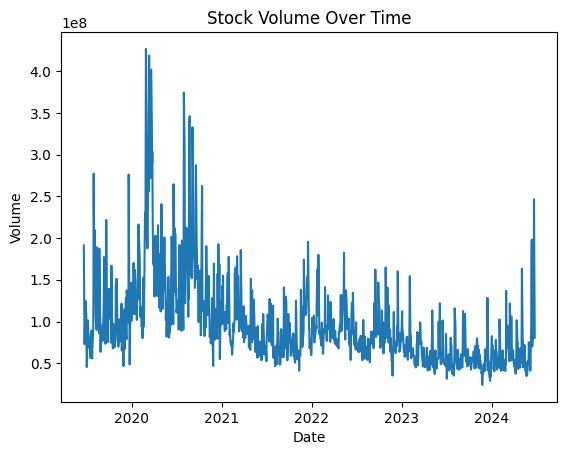

In [9]:
# the volume of stocks traded in the past 5 years
plt.figure()
plt.plot(df['Volume'][-1260:], label='Volume')
plt.title('Stock Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')

Text(0, 0.5, 'Percentage Change')

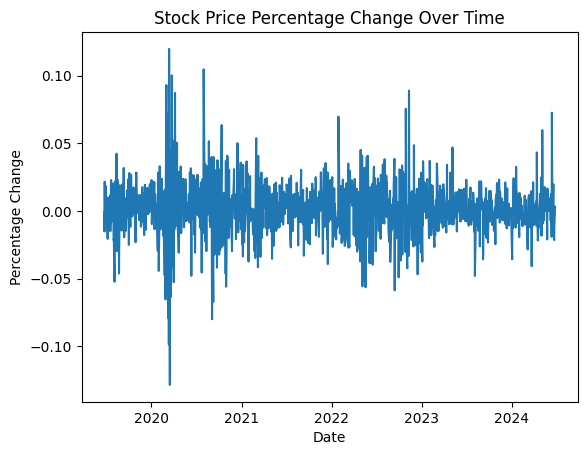

In [10]:
# percentage change in the stock price in the past 5 years
plt.figure()
plt.plot(df['Adj Close'][-1260:].pct_change(), label='Daily Percentage Change')
plt.title('Stock Price Percentage Change Over Time')
plt.xlabel('Date')
plt.ylabel('Percentage Change')

In [11]:
# correlation matrix of the stock data

numeric_data = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()
correlation_matrix["Adj Close"].sort_values(ascending=False)

Adj Close     1.000000
Close         0.999828
Next_Close    0.999770
Low           0.999761
High          0.999752
Open          0.999670
MA50          0.996676
MA100         0.994544
MA200         0.990974
Volume       -0.457869
Name: Adj Close, dtype: float64

In [26]:
# Split the data into training and testing data

df_train = pd.DataFrame(df['Adj Close'][0:int(len(df)*0.7)])
df_test = pd.DataFrame(df['Adj Close'][int(len(df)*0.7):])

print(df_train.shape)
print(df_test.shape)

(4309, 1)
(1848, 1)


In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

df_train_scaled = scaler.fit_transform(df_train)
df_train_scaled.shape

(4309, 1)

In [14]:
# we will take 100 days step to predict the next day's closing price

x_train = []
y_train = []


for i in range(100, df_train_scaled.shape[0]):
    x_train.append(df_train_scaled[i-100:i])
    y_train.append(df_train_scaled[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
type(x_train)

numpy.ndarray

In [15]:
from keras.layers import Dense, LSTM, Dropout
from keras.models import Sequential

In [16]:
print(x_train.shape[1])
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(int(x_train.shape[1]), 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

100


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [19]:
model.compile(optimizer='adam', loss= 'mean_squared_error')
model.fit(x_train, y_train, epochs = 5)

Epoch 1/5
132/132 [==============================] - 45s 306ms/step - loss: 0.0027
Epoch 2/5
132/132 [==============================] - 40s 305ms/step - loss: 0.0026
Epoch 3/5
132/132 [==============================] - 42s 316ms/step - loss: 0.0026
Epoch 4/5
132/132 [==============================] - 40s 305ms/step - loss: 0.0024
Epoch 5/5
132/132 [==============================] - 40s 305ms/step - loss: 0.0025


In [20]:
model.save('keras_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [21]:
past_100_days = df_train.tail(100)

In [29]:
final_test_df = pd.concat([past_100_days, df_test], ignore_index=True)


In [30]:
final_test_df.head()

,Adj Close
0,26.060099
1,26.108583
2,26.307127
3,25.898497
4,26.099346


In [32]:
input_data = scaler.fit_transform(final_test_df)
input_data

array([[0.00796296],
       [0.0082153 ],
       [0.00924863],
       ...,
       [0.96362023],
       [0.95222235],
       [0.95560527]])

In [33]:
input_data.shape

(1948, 1)

In [34]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])

In [36]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape, y_test.shape)

(1848, 100, 1) (1848,)


In [37]:
# Making Predictions

y_predicted = model.predict(x_test)

58/58 [==============================] - 6s 83ms/step


In [38]:
y_predicted.shape

(1848, 1)

In [39]:
y_test

array([0.03695433, 0.03814304, 0.03864029, ..., 0.96362023, 0.95222235,
       0.95560527])

In [40]:
y_predicted

array([[0.02764322],
       [0.0281484 ],
       [0.02868797],
       ...,
       [0.89720994],
       [0.9051134 ],
       [0.9126985 ]], dtype=float32)

In [44]:
scaler.scale_

array([0.00520454])

In [46]:
scale_factor = 1/0.00520454
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor


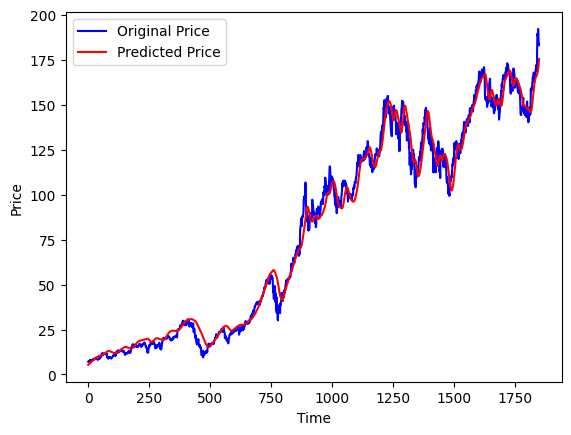

In [47]:
plt.figure()
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()